# Домашнее задание. Блок 2. Практическое задание. Зайцев И.С.

## Задание 1

Сгенерировать случайным образом 3 набораданных(см. картинки). 
Количество точекв каждомот 100 до 200. Цветом обозначены метки классов. Для каждого набора данных:

•Разделить датасет на train/ test(80/20)

•Обучить и протестировать KNN

•Построить графики точностиклассификации(на train/testвыборках) при разных k(1...8)

•Пользуясь стандартными методами из scikit-learnвычислитьточность, полноту и F1-меру,построить матрицу расхождений

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [2]:
np.random.seed(0)

Выберите вариант от 1 до 3

Выбран вариант №1


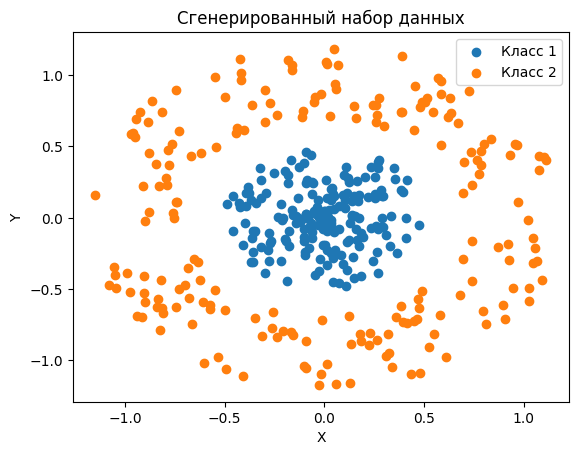

In [9]:
VARIANT = 1

if VARIANT == 1: 
    radius1 = np.random.uniform(0.0, 0.5, 200)  # Радиус от 0 до 0.5
    angle1 = np.random.uniform(0, 2 * np.pi, 200)  # Угол от 0 до 2*pi
    x1 = radius1 * np.cos(angle1)
    y1 = radius1 * np.sin(angle1)


    radius2 = np.random.uniform(0.7, 1.2, 200)  # Радиус от 0.7 до 1.2
    angle2 = np.random.uniform(0, 2 * np.pi, 200)  # Угол от 0 до 2*pi
    x2 = radius2 * np.cos(angle2)
    y2 = radius2 * np.sin(angle2)
    
if VARIANT == 2:
    x1_first = np.random.uniform(0, 5, 100)
    y1_first = np.random.uniform(0, 5, 100)

    x1_last = np.random.uniform(5, 10, 100)
    y1_last = np.random.uniform(5, 10, 100)

    x1 = np.concatenate((x1_first, x1_last))
    y1 = np.concatenate((y1_first, y1_last))


    x2_first = np.random.uniform(0, 5, 100)
    y2_first = np.random.uniform(5, 10, 100)

    x2_last = np.random.uniform(5, 10, 100)
    y2_last = np.random.uniform(0, 5, 100)

    x2 = np.concatenate((x2_first, x2_last))
    y2 = np.concatenate((y2_first, y2_last))
    
if VARIANT == 3:
    x1 = np.random.uniform(0,np.pi, 200)
    y1 = np.sin(x1)
    x1 /= np.pi


    x2 = np.random.uniform(np.pi / 2, 3/2 * np.pi, 200)
    y2 = np.cos(x2)
    x2 /= np.pi  

print(f"Выбран вариант №{VARIANT}")

plt.scatter(x1, y1, label='Класс 1')  # Синий для класса 1
plt.scatter(x2, y2, label='Класс 2')  # Красный для класса 2
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Сгенерированный набор данных')
plt.legend()
plt.show()

In [10]:
# Добавление меток класса 
X = np.vstack((np.concatenate((x1, x2)), np.concatenate((y1, y2)))).T
y = np.concatenate((np.zeros(200), np.ones(200)))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 8 
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучаем модель на обучающих данных
knn_model.fit(X_train, y_train)

# Предсказываем метки для тестовых данных
y_pred = knn_model.predict(X_test)

# Оцениваем производительность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

# Выводим отчет о классификации
report = classification_report(y_test, y_pred)
print('Отчет о классификации:\n', report)


Точность модели: 1.00
Отчет о классификации:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        44
         1.0       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



Матрица расхождений

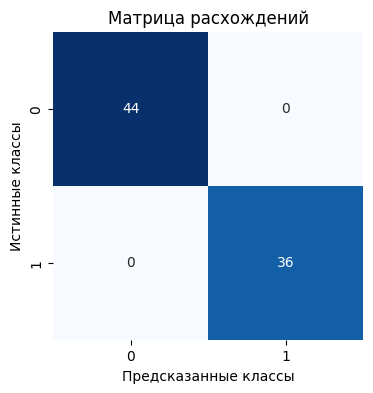

In [11]:
cm = confusion_matrix(y_test, y_pred)

# Визуализируем матрицу расхождений с использованием библиотеки Seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица расхождений')
plt.show()

График точности accuracy(x)

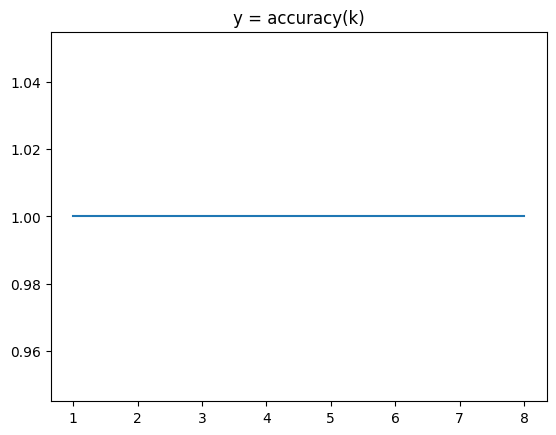

In [12]:
k_arr = np.arange(1, 9)
acc_arr = []
for k in k_arr:
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Обучаем модель на обучающих данных
    knn_model.fit(X_train, y_train)

    # Предсказываем метки для тестовых данных
    y_pred = knn_model.predict(X_test)

    # Оцениваем производительность модели
    accuracy = accuracy_score(y_test, y_pred)
    
    acc_arr.append(accuracy)
    
plt.plot(k_arr, acc_arr)
plt.title('y = accuracy(k)')

plt.show() 

## Задание 2

In [13]:
import numpy as np


In [14]:
C="Cat"
F="Fish"
H="Hen"
# истинныезначениz
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
# результатсистемы
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

labels = {'Cat': 0, 'Fish': 1, 'Hen': 2}

# Кодирование истинных и предсказанных меток
y_true_encoded = np.array([labels[label] for label in y_true])
y_pred_encoded = np.array([labels[label] for label in y_pred])


In [15]:
# Вычисление метрик precision, recall и f1-score для каждого класса
precision_per_class = []
recall_per_class = []
f1_score_per_class = []

for label_id in range(len(labels)):
    TP = np.sum((y_true_encoded == label_id) & (y_pred_encoded == label_id))
    FP = np.sum((y_true_encoded != label_id) & (y_pred_encoded == label_id))
    FN = np.sum((y_true_encoded == label_id) & (y_pred_encoded != label_id))

    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

    precision_per_class.append(precision)
    recall_per_class.append(recall)
    f1_score_per_class.append(f1_score)

# Вычисление macro avg
macro_avg_precision = np.mean(precision_per_class)
macro_avg_recall = np.mean(recall_per_class)
macro_avg_f1_score = np.mean(f1_score_per_class)

# Вычисление weighted avg
class_counts = [np.sum(y_true_encoded == label_id) for label_id in range(len(labels))]
weighted_avg_precision = np.average(precision_per_class, weights=class_counts)
weighted_avg_recall = np.average(recall_per_class, weights=class_counts)
weighted_avg_f1_score = np.average(f1_score_per_class, weights=class_counts)

# Вывод результатов

print("\t Precision\tRecall\tF1-Score")

for (key, value) in labels.items():
    print(f"{key}\t\t{round(precision_per_class[value],2)}\t{round(recall_per_class[value],2)}\t {round(f1_score_per_class[value],2)}")
    

print()
print(f"macro avg \t{round(macro_avg_precision,2)}\t{round(macro_avg_recall,2)}\t{round(macro_avg_f1_score,2)}")
print(f"weighted avg \t{round(weighted_avg_precision,2)}\t{round(weighted_avg_recall,2)}\t{round(weighted_avg_f1_score,2)}")


	 Precision	Recall	F1-Score
Cat		0.31	0.67	 0.42
Fish		0.67	0.2	 0.31
Hen		0.67	0.67	 0.67

macro avg 	0.55	0.51	0.47
weighted avg 	0.58	0.48	0.46


## Задание 3

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [31]:
dataset_filename = "datasets/Mobile phone price.csv"
data = pd.read_csv(dataset_filename, encoding='utf-8')


selected_columns = ['Brand_LabelEncoded','Storage ','RAM ', 'Screen Size (inches)' ,'Battery Capacity (mAh)']
target_column = 'Price ($)'
columns_to_drop = ['Model', 'Camera (MP)']
data = data.drop(columns=columns_to_drop)
data = data.dropna()


In [32]:
data.head()

,Brand,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($)
0,Apple,128 GB,6 GB,6.1,3095,999
1,Samsung,256 GB,12 GB,6.8,5000,1199
2,OnePlus,128 GB,8 GB,6.7,4500,899
3,Xiaomi,128 GB,6 GB,6.67,5020,279
4,Google,128 GB,8 GB,6.4,4614,799


In [33]:
# Нормализация данных
data['Price ($)'] = data['Price ($)'].str.replace(',', '.', regex=False)
data['Price ($)'] = data['Price ($)'].str.replace('$', '', regex=False)

data['Storage '] = data['Storage '].str.replace('GB', '', regex=False)
data['RAM '] = data['RAM '].str.replace('GB', '', regex=False)
data['Screen Size (inches)'] = data['Screen Size (inches)'].str.replace(',', '.')

le = LabelEncoder()
data['Brand_LabelEncoded'] = le.fit_transform(data['Brand'])
brand_code_mapping = {brand_name: brand_code for brand_name, brand_code in zip(data['Brand'], data['Brand_LabelEncoded'])}


# Примените нормализацию к данным

for selected_column in selected_columns:    
    data[selected_column] = pd.to_numeric(data[selected_column], errors='coerce')
    data = data.dropna()
    print(f"{selected_column} {data[selected_column].isna().sum()}")
    

# data.head()


Brand_LabelEncoded 0
Storage  0
RAM  0
Screen Size (inches) 0
Battery Capacity (mAh) 0


In [34]:
X = data[selected_columns]  
y = data[target_column]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 23699.537943940522
R-squared: 0.7300458571279869


In [35]:
for selected_column in selected_columns:
    X = data[selected_column].array.reshape(-1, 1) 
    y = data[target_column]  
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{selected_column} Mean Squared Error:", round(mse,3))
    print(f"{selected_column} R-squared:", round(r2,3))
    print()

Brand_LabelEncoded Mean Squared Error: 72258.163
Brand_LabelEncoded R-squared: 0.177

Storage  Mean Squared Error: 49062.562
Storage  R-squared: 0.441

RAM  Mean Squared Error: 68486.783
RAM  R-squared: 0.22

Screen Size (inches) Mean Squared Error: 91173.052
Screen Size (inches) R-squared: -0.039

Battery Capacity (mAh) Mean Squared Error: 65466.541
Battery Capacity (mAh) R-squared: 0.254



Лучше всего значение R-squared дает Storage